In [49]:
import numpy as np

np.random.seed(0)
arr = np.random.randint(0, 100, size=(4, 5))
print("arr:\n", arr)
print("max:", arr.max())
print("min:", arr.min())
print("mean:", arr.mean())
print("argmax:", arr.argmax())
print("argmin:", arr.argmin())

reshaped = arr.reshape(5, 4)
print("\nreshape(5,4):\n", reshaped)

arr2 = np.random.randint(0, 100, size=(4, 5))
print("\narr2:\n", arr2)
print("\narr + arr2:\n", arr + arr2)

a = np.random.randn(10)
b = np.random.randn(10)
print("\n(a * b).sum():", (a * b).sum())
print("np.dot(a, b):", np.dot(a, b))

mat = np.arange(0, 100).reshape(10, 10)
row, col = 1, 7
print("\nmat:\n", mat)
print("\nmat[1,7]:", mat[row, col])
print("\nстолбец 7:\n", mat[:, col].reshape(-1, 1))
print("\nстрока 1:\n", mat[row, :])
print("\nверхний левый 3x3:\n", mat[0:3, 0:3])


arr:
 [[44 47 64 67 67]
 [ 9 83 21 36 87]
 [70 88 88 12 58]
 [65 39 87 46 88]]
max: 88
min: 9
mean: 58.3
argmax (индекс максимума в 1D): 11
argmin: 5

reshape(5,4):
 [[44 47 64 67]
 [67  9 83 21]
 [36 87 70 88]
 [88 12 58 65]
 [39 87 46 88]]

arr2:
 [[81 37 25 77 72]
 [ 9 20 80 69 79]
 [47 64 82 99 88]
 [49 29 19 19 14]]

arr + arr2:
 [[125  84  89 144 139]
 [ 18 103 101 105 166]
 [117 152 170 111 146]
 [114  68 106  65 102]]

(a * b).sum(): -2.6992649418022188
np.dot(a, b): -2.6992649418022188

mat:
 [[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]

mat[1,7]: 17

столбец 7:
 [[ 7]
 [17]
 [27]
 [37]
 [47]
 [57]
 [67]
 [77]
 [87]
 [97]]

строка 1:
 [10 11 12 13 14 15 16 17 18 19]

верхний левый 3x3:
 [[ 0  1  

In [52]:
from pathlib import Path
import cv2
import numpy as np
import matplotlib.pyplot as plt

BASE_DIR = Path.cwd()
IMAGE_PATH = BASE_DIR / "chess.jpg"

print("BASE_DIR:", BASE_DIR)
print("IMAGE_PATH:", IMAGE_PATH)
print("IMAGE_PATH exists:", IMAGE_PATH.exists())


BASE_DIR: C:\Users\wiad_\PycharmProjects\ItmoCv
IMAGE_PATH: C:\Users\wiad_\PycharmProjects\ItmoCv\chess.jpg
IMAGE_PATH exists: True


Объектов нашли: 7


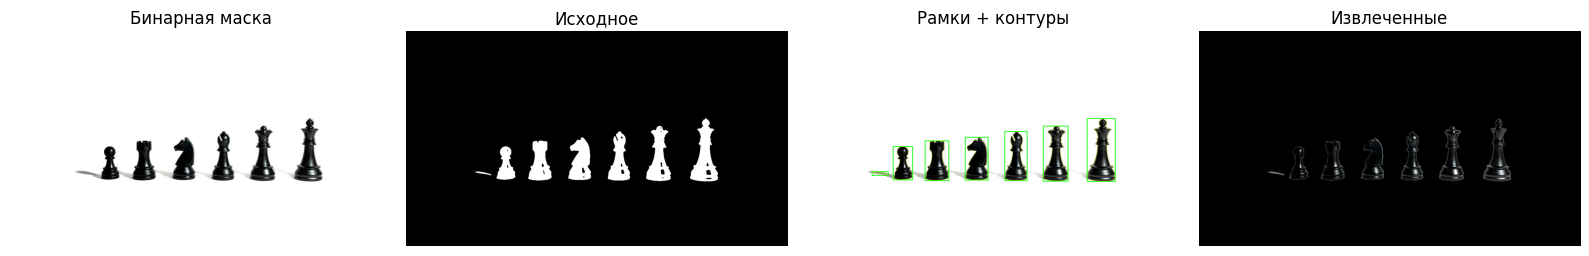

In [72]:
img_bgr = cv2.imread(str(IMAGE_PATH))

gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (7, 7), 0)
_, binary_mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)


contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours = [c for c in contours if cv2.contourArea(c) >= 120]

annotated = img_bgr.copy()
object_mask = np.zeros(img_bgr.shape[:2], dtype=np.uint8)

for c in contours:
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(annotated, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.polylines(annotated, [c], isClosed=True, color=(0, 255, 255), thickness=1)
    cv2.drawContours(object_mask, [c], -1, 255, thickness=-1)

extracted = cv2.bitwise_and(img_bgr, img_bgr, mask=object_mask)

print("Объектов нашли:", len(contours))

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
annotated_rgb = cv2.cvtColor(annotated, cv2.COLOR_BGR2RGB)
extracted_rgb = cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB)


plt.figure(figsize=(16, 5))
plt.subplot(1, 4, 2)
plt.title("Исходное")
plt.imshow(binary_mask, cmap="gray")
plt.axis("off")

plt.subplot(1, 4, 1)
plt.title("Бинарная маска")
plt.imshow(img_rgb)
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Рамки + контуры")
plt.imshow(annotated_rgb)
plt.axis("off")

plt.subplot(1, 4, 4)
plt.title("Извлеченные")
plt.imshow(extracted_rgb)
plt.axis("off")

plt.tight_layout()
plt.show()



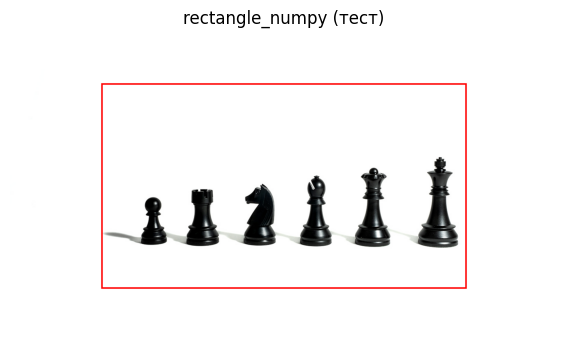

In [77]:
def rectangle_numpy(image, top_left, bottom_right, color=(255, 0, 0), thickness=3):
    out = image.copy()
    h, w = out.shape[:2]
    x1, y1 = top_left
    x2, y2 = bottom_right

    x1, x2 = sorted((int(x1), int(x2)))
    y1, y2 = sorted((int(y1), int(y2)))

    x1 = int(np.clip(x1, 0, w - 1))
    x2 = int(np.clip(x2, 0, w - 1))
    y1 = int(np.clip(y1, 0, h - 1))
    y2 = int(np.clip(y2, 0, h - 1))

    if x1 >= x2 or y1 >= y2:
        return out

    c = np.array(color, dtype=out.dtype)
    t = max(1, int(thickness))

    out[y1:y1 + t, x1:x2 + 1] = c
    out[y2 - t + 1:y2 + 1, x1:x2 + 1] = c
    out[y1:y2 + 1, x1:x1 + t] = c
    out[y1:y2 + 1, x2 - t + 1:x2 + 1] = c
    return out

h, w = img_bgr.shape[:2]
top_left = (w // 6, h // 6)
bottom_right = (w * 5 // 6, h * 5 // 6)

out_img = rectangle_numpy(img_bgr, top_left, bottom_right, color=(0, 0, 255), thickness=4)

plt.figure(figsize=(10,4))
plt.title("rectangle_numpy (тест)")
plt.imshow(cv2.cvtColor(out_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()
